In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
#os.chdir("C:/Users/ACER/anaconda3/data_analys/Lect_04/задача_2_Economics of Cities/")

### Загрузка данных

In [15]:
df = pd.read_csv("data_o.csv", sep=";")
df.head()

,x,y
0,0,0
1,2,4
2,3,3
3,1,2
4,3,0


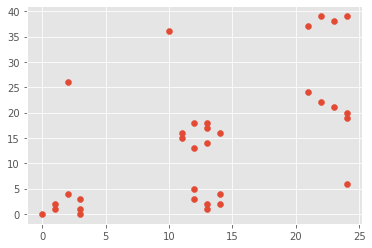

In [16]:
scatter(df['x'],df['y']);

Видно, что все кластеры визуально различимы

### По методу полной связи

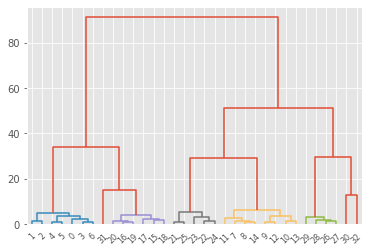

In [17]:
link = linkage(df[['x','y']], 'ward', 'euclidean') #median
dn = dendrogram(link, color_threshold = 10, labels=df.index.tolist())

In [18]:
df['cluster'] = fcluster(link, 10, criterion='distance')
df.groupby('cluster').mean()

,x,y
cluster,,
1,1.857143,1.571429
2,13.000000,2.833333
3,24.000000,6.000000
4,22.800000,21.200000
5,12.375000,15.875000
6,22.500000,38.250000
7,2.000000,26.000000
8,10.000000,36.000000


Text(0, 0.5, 'Distance')

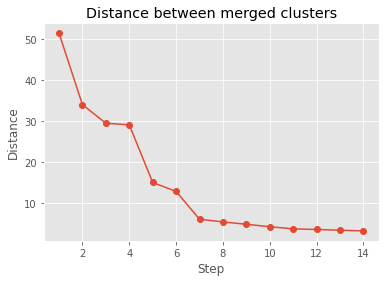

In [19]:
dist = link[-15:-1, 2]
#dist = link[-15:len(link)+1, 2]
# первый вариант лучше, так как последняя точка на отображении искажает масштаб
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')


In [20]:
df['cluster'].sort_values()
# данный метод определяет те же кластеры, что при визуальном распознавании

0     1
1     1
2     1
3     1
4     1
5     1
6     1
20    2
19    2
18    2
17    2
15    2
16    2
31    3
22    4
25    4
24    4
23    4
21    4
12    5
13    5
8     5
9     5
10    5
11    5
14    5
7     5
26    6
27    6
28    6
29    6
30    7
32    8
Name: cluster, dtype: int32

### Кластеризация методом K-средних

In [21]:
df2 = pd.read_csv("data_o.csv", sep=";")

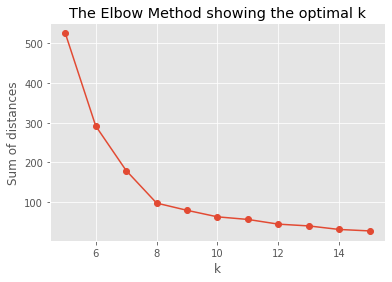

In [22]:
cluster_number_range = range(5, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(df[['x','y']]) for k in cluster_number_range]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(cluster_number_range, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [23]:
cluster_number_range = range(5, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(df2) for k in cluster_number_range]
dist = [(i+5, models[i].inertia_) for i in range(len(models))]
dist

[(5, 525.6698412698413),
 (6, 291.8142857142857),
 (7, 179.5047619047619),
 (8, 97.5047619047619),
 (9, 79.2547619047619),
 (10, 62.82142857142858),
 (11, 56.25),
 (12, 44.416666666666664),
 (13, 39.91666666666667),
 (14, 31.0),
 (15, 27.333333333333336)]

In [24]:
model = KMeans(n_clusters=8, random_state=42, max_iter=300, n_init=10, verbose=0 )
model.fit(df2)

#model.labels_
df['Kmeans'] = model.labels_
df[['x','y', 'Kmeans']].groupby('Kmeans').mean()

,x,y
Kmeans,,
0,22.500000,38.250000
1,13.000000,2.833333
2,22.800000,21.200000
3,12.375000,15.875000
4,1.857143,1.571429
5,2.000000,26.000000
6,10.000000,36.000000
7,24.000000,6.000000


### Кластеризация DBSCAN

In [26]:
df3 = pd.read_csv("data_o.csv", sep=";")

In [27]:

dbscan_1 = DBSCAN(eps=6, metric='euclidean', min_samples=3)

dbscan_1.fit(df[['x','y']])
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
df['dbscan'] = dbscan_1.labels_
print(np.asarray((unique, counts)).T)
#data_frame['cluster'] = dbscan_1.labels_
#data_frame.groupby('cluster').mean()

[[-1  3]
 [ 0  7]
 [ 1  8]
 [ 2  6]
 [ 3  5]
 [ 4  4]]


### Итог

In [28]:
df[['x','y', 'dbscan']].groupby('dbscan').mean()

,x,y
dbscan,,
-1,12.000000,22.666667
0,1.857143,1.571429
1,12.375000,15.875000
2,13.000000,2.833333
3,22.800000,21.200000
4,22.500000,38.250000


In [76]:
df[['x','y', 'Kmeans']].groupby('Kmeans').mean()


,x,y
Kmeans,,
0,22.800000,21.200000
1,13.000000,2.833333
2,12.375000,15.875000
3,22.500000,38.250000
4,1.857143,1.571429
5,10.000000,36.000000
6,24.000000,6.000000
7,2.000000,26.000000


In [77]:
df[['x','y', 'cluster']].groupby('cluster').mean()

,x,y
cluster,,
1,1.857143,1.571429
2,13.000000,2.833333
3,24.000000,6.000000
4,22.800000,21.200000
5,12.375000,15.875000
6,22.500000,38.250000
7,2.000000,26.000000
8,10.000000,36.000000


In [81]:
tab1 = pd.crosstab(df['dbscan'], df['cluster'])
tab2 = pd.crosstab(df['dbscan'], df['Kmeans'])
tab3 = pd.crosstab(df['cluster'], df['Kmeans'])

print(tab1)
print('###############################')
print(tab2)
print('###############################')
print(tab3)

cluster  1  2  3  4  5  6  7  8
dbscan                         
-1       0  0  1  0  0  0  1  1
 0       7  0  0  0  0  0  0  0
 1       0  0  0  0  8  0  0  0
 2       0  6  0  0  0  0  0  0
 3       0  0  0  5  0  0  0  0
 4       0  0  0  0  0  4  0  0
###############################
Kmeans  0  1  2  3  4  5  6  7
dbscan                        
-1      0  0  0  0  0  1  1  1
 0      0  0  0  0  7  0  0  0
 1      0  0  8  0  0  0  0  0
 2      0  6  0  0  0  0  0  0
 3      5  0  0  0  0  0  0  0
 4      0  0  0  4  0  0  0  0
###############################
Kmeans   0  1  2  3  4  5  6  7
cluster                        
1        0  0  0  0  7  0  0  0
2        0  6  0  0  0  0  0  0
3        0  0  0  0  0  0  1  0
4        5  0  0  0  0  0  0  0
5        0  0  8  0  0  0  0  0
6        0  0  0  4  0  0  0  0
7        0  0  0  0  0  0  0  1
8        0  0  0  0  0  1  0  0
